In [39]:
import torch
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import random
import torch
import src.wrappers.wrapers as wrapers
import json
from pathlib import Path

def load_model(model_path):
    path = Path(model_path)
    
    config = json.load(open(path.parent.parent/'config.json'))
    checkpoint = torch.load(path.as_posix(), map_location=torch.device('cuda:0'))
    
    model = getattr(wrapers, config["MODEL_WRAPER"])(config)
    model.load_state_dict(checkpoint['state_dict'])

    return model, config

def predict(model, full_vertex, positional_encoding: bool):   
    pred = np.zeros_like(full_vertex)
    for i in range(full_vertex.shape[0]):
        for j in range(full_vertex.shape[1]):
            r = random.randint(0, full_vertex.shape[2] - 1)
            pos = []
            
            if positional_encoding:
                pos = [i, j, r]

            dim1 = full_vertex[i, j, :]
            dim2 = full_vertex[i, :, r]
            dim3 = full_vertex[:, j, r]
            full_input = torch.tensor([*pos, *dim1, *dim2, *dim3], dtype=torch.float32)
            pred[i, j, :] = model(full_input.to("cpu")).detach().numpy()
            del dim1, dim2, dim3, full_input
    return pred

def get_vertex_from_filepath(path: str):
    with h5py.File(path, 'r') as f:
        for name, data in f["V"].items():
            if name.startswith("step"):
                return data[()]
            
def create_graph(data, name: str, figSize = (12,7), lim = None, ylabel = None, use_keys = True, x_label = 'out_dim'):

    marker = "o"

    # plot
    plt.rcParams['figure.figsize'] = figSize

    plt.plot(data.keys(), data.values(), marker=marker)

    plt.title(name, fontsize=15)
    plt.ylabel(name if not ylabel else ylabel, fontsize=12)
    if lim:
        plt.ylim(lim)
    if use_keys:
        plt.xticks(sorted(list(data.keys())))
    plt.xlabel(x_label, fontsize=12)
    plt.show()

In [35]:
models = [
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_6\\checkpoints\\epoch=99-step=560000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_0\\checkpoints\\epoch=149-step=840000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_1\\checkpoints\\epoch=99-step=560000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_2\\checkpoints\\epoch=99-step=560000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_3\\checkpoints\\epoch=99-step=560000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_4\\checkpoints\\epoch=99-step=560000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_5\\checkpoints\\epoch=99-step=560000.ckpt"
]
data_path = "D:\\FRGS\\tp0.050000_mu0.200000.h5"

data = np.array(get_vertex_from_filepath(data_path))

mse_result = dict()
mae_result = dict()

for model_path in models:
    model, config = load_model(model_path)
    model.model.eval()
    prediction = predict(model, data, positional_encoding=config["positional_encoding"])
    mse = np.square(data - prediction).mean()
    mse_result[config["encoder_dim"]] = mse
    mae = np.abs(data - prediction).mean()
    mae_result[config["encoder_dim"]] = mae



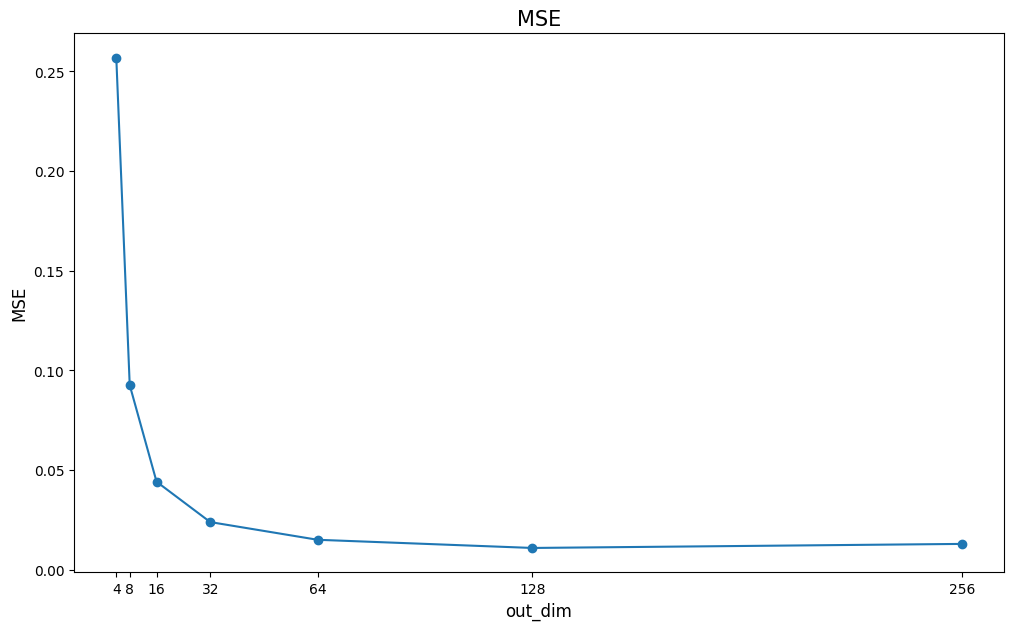

In [37]:
create_graph(mse_result, "MSE")

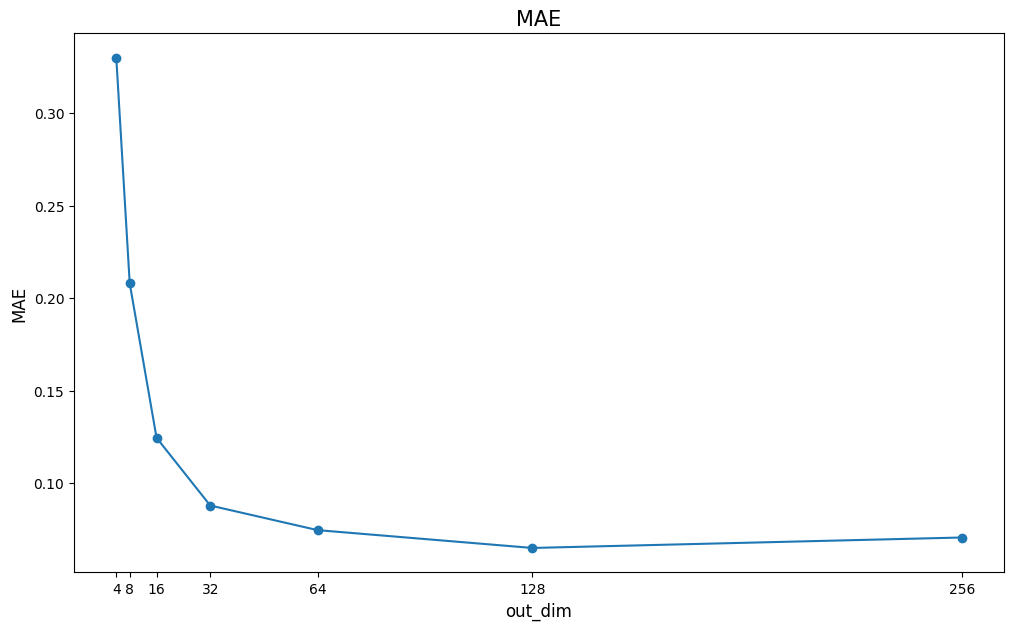

In [38]:
create_graph(mae_result, "MAE")

In [41]:
models = [
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_0\\checkpoints\\epoch=149-step=840000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_8\\checkpoints\\epoch=99-step=560000.ckpt",
    "C:\\Users\\Daniel\\OneDrive - TU Wien\\Uni\\6. Semester\\Bachelorarbeit\\autoencoder\\LuttingerWard_from_ML\\saves\\vertex\\save_auto_encoder_vertex_BS10_2024-07-16\\version_9\\checkpoints\\epoch=99-step=2800000.ckpt",
]
data_path = "D:\\FRGS\\tp0.050000_mu0.200000.h5"

data = np.array(get_vertex_from_filepath(data_path))

mse_result = dict()
mae_result = dict()

for model_path in models:
    model, config = load_model(model_path)
    model.model.eval()
    prediction = predict(model, data, positional_encoding=config["positional_encoding"])
    mse = np.square(data - prediction).mean()
    index = f"{config["batch_size"]}{config["positional_encoding"]}"
    mse_result[index] = mse
    mae = np.abs(data - prediction).mean()
    mae_result[index] = mae

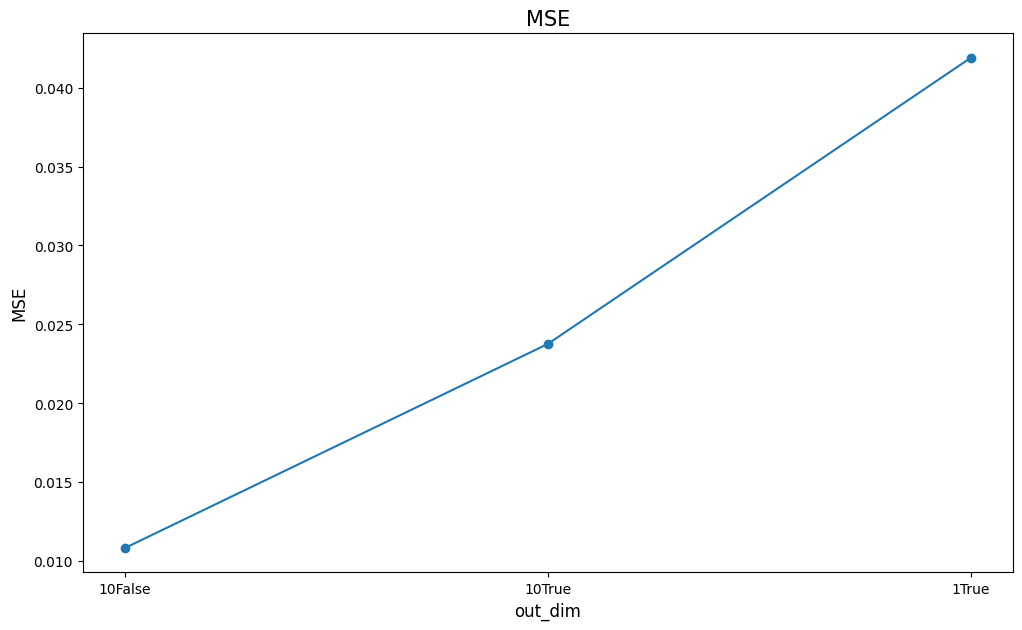

In [42]:
create_graph(mse_result, "MSE", use_keys=False)

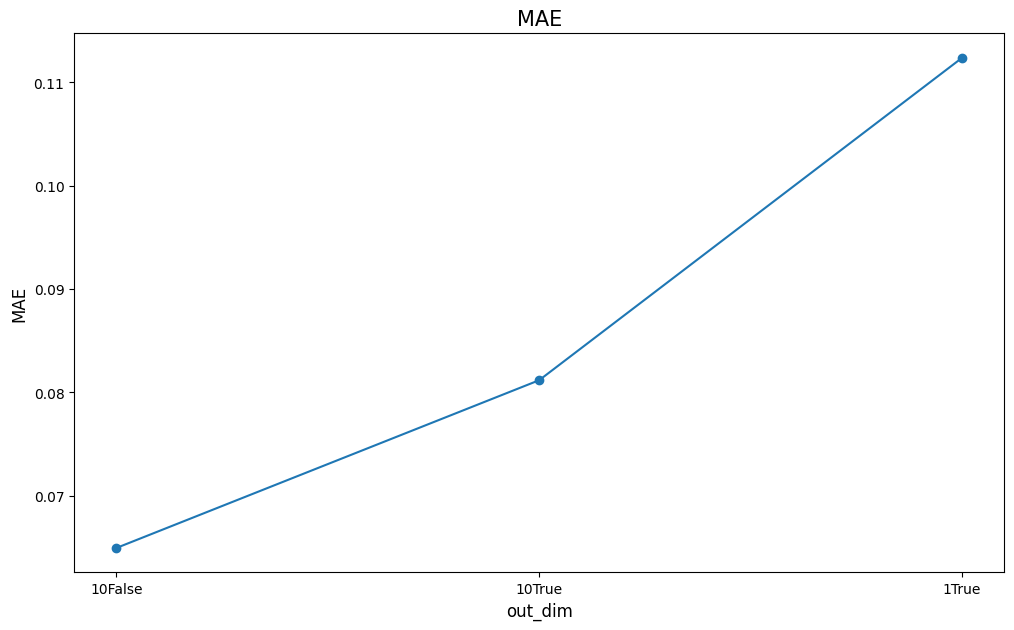

In [43]:
create_graph(mae_result, "MAE", use_keys=False)